# 길거리 간접흡연 문제 해결 프로젝트


# 배경
* 간접흡연 피해 경험자의 86%가 가장 심각한 피해 장소로 '길거리'를 꼽음.
* 흡연자를 비난하는 용어가 생기는 등 흡연자와 비흡연자의 갈등이 심화되고 있음.
* 2018년 1년 동안 서울시 평균 흡연단속 건수는 1800건으로 상당히 높음

# 활용 데이터 소개 

 1) 데이터 셋 목록
* 서울시 현재흡연율 통계
* 연령별, 성별 흡연 & 전자흡연 관련 문항 (KOSIS)
* 자치구 단위 생활인구_내국인 (서울시)
* 국민건강영양조사 (질병관리청)
* 소상공인시장진흥공단_상가정보
 
2) 변수의 조작적 정의
* **구별 추정 흡연자 수** : 현재 흡연율 X 주민등록인구 수

* **35~54세 생활인구수** : 남성 35~54세 생활인구수 = 주요 흡연자 수


#분석을 위한 셋팅


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# # 한글폰트를 설정합니다.
# #1.나눔폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# #2.런타임 다시 시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# seaborn 스타일 변경
sns.set(color_codes =True) 

In [ ]:
# matplotlib의 폰트를 Nanum 폰트로 지정
import matplotlib.pyplot as plt
plt.rc ("font", family = "NanumBarunGothic")

In [ ]:
# 마이너스 부호 표시
plt.rc("axes", unicode_minus = False) 

# 1. 문제분석 

서울 열린데이터 광장에서 제공하는 "서울시 현재흡연율 통계" 이용

출처 :https://data.seoul.go.kr/dataList/10668/S/2/datasetView.do#

## 구별 흡연 단속건수 시각화

In [ ]:
# 구별 흡연 관련 데이터 
df5 = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/구별흡연단속비율_2018.csv", encoding ="cp949")
df5.head()

,구,흡연민원건수,흡연단속건수,흡연구역수,금연구역수,주민등록인구수,흡연율,추정흡연자수,흡연자수대비단속건수
0,영등포구,NaN,6278,491,13881,403600,0.16,63365,0.099
1,노원구,NaN,2716,70,11074,548160,0.18,96476,0.028
2,송파구,1852.0,2332,145,16997,673507,0.15,100353,0.023
3,중구,1856.0,1754,422,12480,135633,0.23,31196,0.056
4,광진구,485.0,1415,158,9982,371063,0.21,78665,0.018


In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   구           25 non-null     object 
 1   흡연민원건수      15 non-null     float64
 2   흡연단속건수      25 non-null     int64  
 3   흡연구역수       25 non-null     int64  
 4   금연구역수       25 non-null     int64  
 5   주민등록인구수     25 non-null     int64  
 6   흡연율         25 non-null     float64
 7   추정흡연자수      25 non-null     int64  
 8   흡연자수대비단속건수  25 non-null     float64
dtypes: float64(3), int64(5), object(1)
memory usage: 1.9+ KB


In [ ]:
# 흡연단속건수로 내림차순 정렬
df5.sort_values("흡연단속건수", ascending = False, inplace = True)

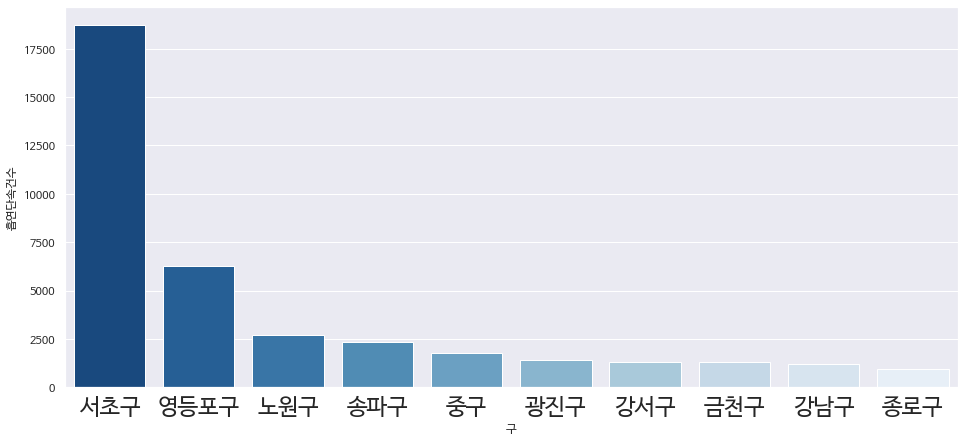

In [ ]:
# 구별 흡연단속건수 시각화
plt.figure(figsize = (16,7))
plt.rc('xtick', labelsize=23)
sns.barplot(data = df5.head(10), x ="구", y="흡연단속건수", palette="Blues_r" )

구별 흡연단속건수는 서초구가 월등히 높고 그 다음으로 영등포, 노원, 송파, 중구 순이다.

## 구별 흡연자 수 시각화
서울시 열린데이터 광장에서 제공하는 "서울시 현재흡연율 통계" 이용
https://data.seoul.go.kr/dataList/10668/S/2/datasetView.do# 

In [ ]:
# 흡연자수로 내림차순 정렬 > 상위5개 구
df5.sort_values("추정흡연자수", ascending = False, inplace = True)
df5[["구","추정흡연자수"]].head()

,구,추정흡연자수
16,관악구,117529
5,강서구,114082
15,은평구,104848
2,송파구,100353
7,강남구,98542


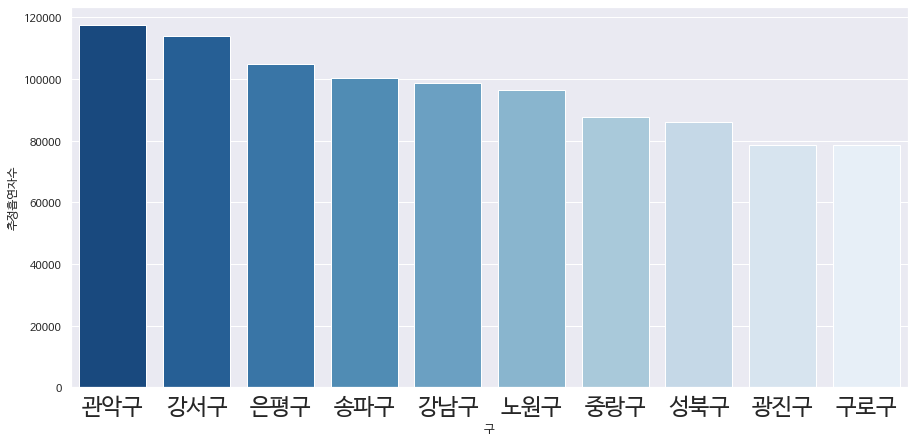

In [ ]:
# 구별 흡연자수 시각화
plt.figure(figsize = (15,7))
plt.rc('xtick', labelsize=23)
sns.barplot(data = df5.head(10) ,y= "추정흡연자수", x = "구", palette="Blues_r" )

구별 흡연자수는 관악, 강서, 은평, 송파, 강남구 순이다.

이는 구별 흡연단속 건수 상위 5개 구 (서초, 영등포, 노원, 송파, 중구)와 **전혀 다르다.**


##구별 흡연 단속건수와 흡연자 수 사이의 상관관계 분석




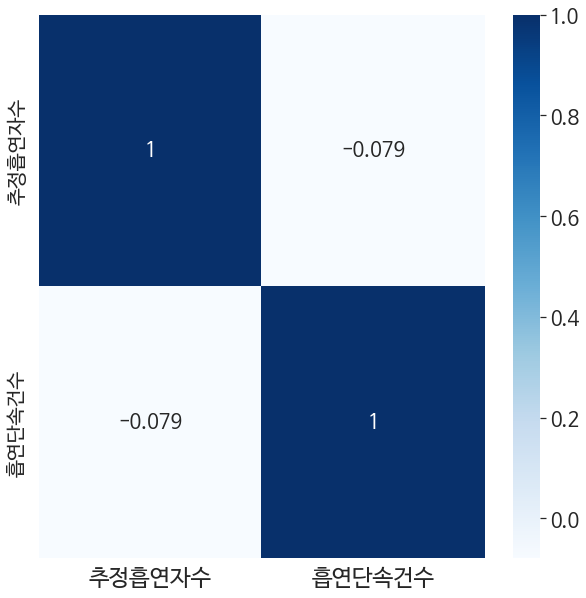

In [ ]:
# 상관관계 분석
corr = df5[["추정흡연자수","흡연단속건수"]].corr()
plt.figure(figsize=(10, 10))
plt.rc('xtick', labelsize=23)
plt.rc('ytick', labelsize=20)
sns.heatmap(corr, cmap="Blues", annot=True, annot_kws={"size": 20})

추정 흡연자수와 흡연 단속건수의 상관계수가 0에 가까우므로 두 변수 사이에 **상관관계가 없다**.

따라서 단순히 전체 흡연자가 아닌 단속 건수에 영향을 끼치는 핵심 원인 집단을 찾아야 한다.

# 2. 주요 흡연자층 설정
성별 연령별 흡연자 데이터 분석


* 일반 담배 

  kosis에서 제공하는 "연령별 성별 흡연 관련 문항" 데이터 이용
    
    출처: https://kosis.kr/statHtml/statHtml.do?orgId=350&tblId=DT_35007_N045&vw_cd=MT_ZTITLE&list_id=350_35007_A006&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE



* 전자 담배 
  
  kosis에서 제공하는 "연령별 성별 전자흡연 관련 문항" 이용

  출처: https://kosis.kr/statHtml/statHtml.do?orgId=350&tblId=DT_35007_N0450&vw_cd=MT_ZTITLE&list_id=350_35007_A006&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE 




### 일반 담배 



In [ ]:
# df1 : 일반 담배
df1 = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/평생 총 5갑이상 담배 흡연 여부.csv", encoding="cp949" )
df1.head()

,연령별,성별,소계,비흡연,현재금연,현재흡연
0,계,합계,15073258,9163998,2667748,3241512
1,계,남자,8105654,2614152,2497639,2993863
2,계,여자,6967604,6549846,170109,247649
3,19세 이하,합계,21546,15530,932,5084
4,19세 이하,남자,13108,8347,685,4076


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연령별     48 non-null     object
 1   성별      48 non-null     object
 2   소계      48 non-null     int64 
 3   비흡연     48 non-null     int64 
 4   현재금연    48 non-null     int64 
 5   현재흡연    48 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 2.4+ KB


In [ ]:
# sm1 : 현재흡연자 데이터만 
sm1 = df1.drop(["소계", "비흡연", "현재금연"],axis=1)
sm1.head()

,연령별,성별,현재흡연
0,계,합계,3241512
1,계,남자,2993863
2,계,여자,247649
3,19세 이하,합계,5084
4,19세 이하,남자,4076


In [ ]:
# sm2 :합계를 제외한 연령별 성별 흡연자수 데이터
sm2 = sm1[sm1["성별"] != "합계"].loc[4:]
sm2.head()

,연령별,성별,현재흡연
4,19세 이하,남자,4076
5,19세 이하,여자,1008
7,20 ~ 24세,남자,68535
8,20 ~ 24세,여자,18283
10,25 ~ 29세,남자,231340


### 전자 담배 


In [ ]:
# df3 : 전자담배
df3 = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/전자담배 사용경험 유무.csv", encoding="cp949" )
df3.head()

,연령별,성별,소계,있음,없음
0,계,합계,16089749,822969,15266780
1,계,남자,8391205,701333,7689872
2,계,여자,7698544,121636,7576908
3,19세 이하,합계,16160,2525,13635
4,19세 이하,남자,10647,2072,8575


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연령별     48 non-null     object
 1   성별      48 non-null     object
 2   소계      48 non-null     int64 
 3   있음      48 non-null     int64 
 4   없음      48 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.0+ KB


In [ ]:
# sm1 : 현재 전자담배 사용자 데이터만 
e_sm1 = df3.drop(["소계", "없음"],axis=1)
e_sm1.head()

,연령별,성별,있음
0,계,합계,822969
1,계,남자,701333
2,계,여자,121636
3,19세 이하,합계,2525
4,19세 이하,남자,2072


In [ ]:
# e_sm2 : 연령별 성별 전자담배 사용자수 데이터
e_sm2 = e_sm1[e_sm1["성별"] != "합계"].loc[4:]
e_sm2.head()

,연령별,성별,있음
4,19세 이하,남자,2072
5,19세 이하,여자,453
7,20 ~ 24세,남자,46880
8,20 ~ 24세,여자,19385
10,25 ~ 29세,남자,110575


### 흡연자 데이터 분석

In [ ]:
#M : 담배와 전자담배를 합한 전체 흡연자 수 
M = pd.merge(sm2, e_sm2, on = ["연령별", "성별"])
M.head()

,연령별,성별,현재흡연,있음
0,19세 이하,남자,4076,2072
1,19세 이하,여자,1008,453
2,20 ~ 24세,남자,68535,46880
3,20 ~ 24세,여자,18283,19385
4,25 ~ 29세,남자,231340,110575


In [ ]:
M["합계"] = M["현재흡연"] + M["있음"]
M.head()

,연령별,성별,현재흡연,있음,합계
0,19세 이하,남자,4076,2072,6148
1,19세 이하,여자,1008,453,1461
2,20 ~ 24세,남자,68535,46880,115415
3,20 ~ 24세,여자,18283,19385,37668
4,25 ~ 29세,남자,231340,110575,341915


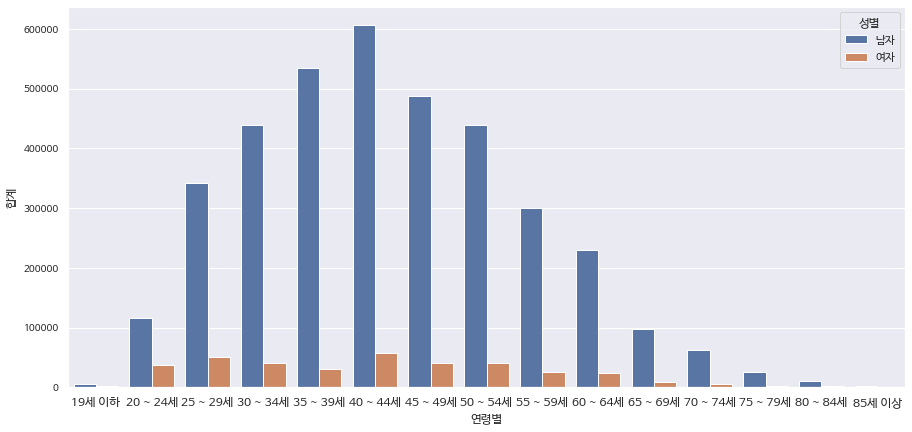

In [ ]:
plt.figure(figsize = (15,7))
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=10)
sns.barplot(data = M , x="연령별", hue = "성별", y = "합계",palette = "deep")

연령별 성별 흡연자 수를 보면 남성이 여성에 비해 월등히 담배를 많이 피는 것을 알 수 있다. 



### 주요 흡연자 층 = 남성 흡연자 중 상위 25% 

누가 흡연을 가장 많이 하나?

In [ ]:
# man3 : 전체 흡연자 중 남성만
man3 = M[M["성별"]=="남자"]
man3["합계"].describe()

count        15.000000
mean     246346.400000
std      215715.664651
min        1516.000000
25%       43636.500000
50%      229409.000000
75%      438588.500000
max      606488.000000
Name: 합계, dtype: float64

In [ ]:
# 상위 25% 그룹만보기
man3[man3["합계"]>=438588.5]["연령별"]

8     35 ~ 39세
10    40 ~ 44세
12    45 ~ 49세
14    50 ~ 54세
Name: 연령별, dtype: object

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


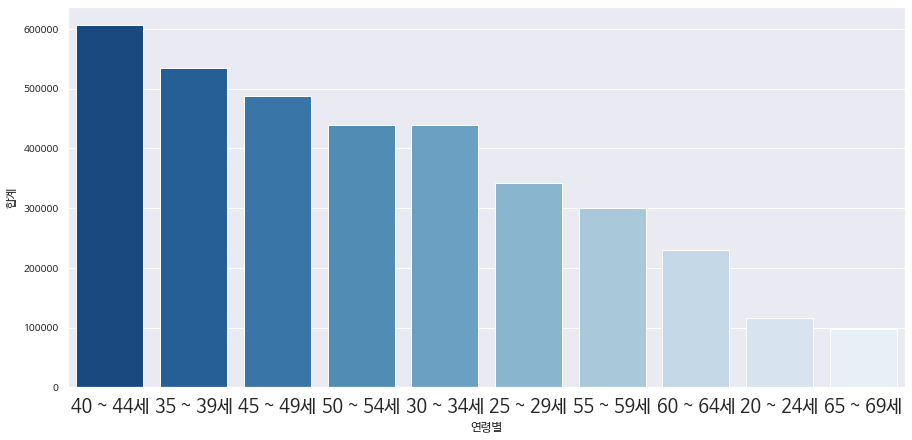

In [ ]:
# 연령별 흡연자수 분포 시각화
man3.sort_values("합계",ascending =False, inplace =True)
plt.figure(figsize = (15,7))
plt.rc('xtick', labelsize=18)
sns.barplot(data=man3.head(10), x="연령별", y="합계", palette="Blues_r"  )

남성의 연령별 흡연자 수 중에서 상위 25%를 차지하는 **35~54세 흡연자를 주요 흡연자 층**으로 정의하였다. 

## 구별 주요 흡연자수 파악
서울 열린데이터 광장에서 제공하는 "자치구단위 생활인구(내국인)" 데이터 이용

출처 : https://data.seoul.go.kr/dataList/OA-15439/S/1/datasetView.do 

In [ ]:
# df4 : 서울시 구별 생활인구 
df4 = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/서울시_구별_생활인구_2020.csv", encoding = "cp949")
df4.head()

,기준일ID,시간대구분,자치구코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,남자35세부터39세생활인구수,남자40세부터44세생활인구수,남자45세부터49세생활인구수,남자50세부터54세생활인구수,남자55세부터59세생활인구수,남자60세부터64세생활인구수,남자65세부터69세생활인구수,남자70세이상생활인구수,여자0세부터9세생활인구수,여자10세부터14세생활인구수,여자15세부터19세생활인구수,여자20세부터24세생활인구수,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,20200101,0,11110,248283,6497,3520,6348,12254,12939,9583,9697,8895,10753,8729,9514,7642,5264,11349,5556,3273,6859,13137,11259,8427,8607,8012,9876,8487,9490,8222,6400,17695
1,20200101,0,11140,187720,4656,1818,3501,7226,9428,8788,9442,8264,8377,6823,7088,5844,4206,7898,4679,2041,3692,9039,10079,8195,8309,6605,7053,5983,6620,5916,4544,11604
2,20200101,0,11170,292640,7595,3784,6324,11834,15891,14739,15019,11917,12483,9925,9196,7849,5534,11354,7757,3783,6188,13744,16183,13761,13668,10515,11290,8830,9709,8644,6372,18756
3,20200101,0,11200,333268,12520,5416,7183,10467,13384,13655,15979,13432,13956,11498,12265,9705,6968,13474,11680,5215,7317,12569,13626,14262,16000,12893,13062,11208,12904,11579,8482,22570
4,20200101,0,11215,390059,12016,6462,12039,16339,18368,15747,16094,13784,15566,13117,14091,11018,7373,14542,11561,6394,12189,19502,18311,16293,16085,13893,15361,14039,14904,13224,9307,22441


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219600 entries, 0 to 219599
Data columns (total 32 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   기준일ID            219600 non-null  int64
 1   시간대구분            219600 non-null  int64
 2   자치구코드            219600 non-null  int64
 3   총생활인구수           219600 non-null  int64
 4   남자0세부터9세생활인구수    219600 non-null  int64
 5   남자10세부터14세생활인구수  219600 non-null  int64
 6   남자15세부터19세생활인구수  219600 non-null  int64
 7   남자20세부터24세생활인구수  219600 non-null  int64
 8   남자25세부터29세생활인구수  219600 non-null  int64
 9   남자30세부터34세생활인구수  219600 non-null  int64
 10  남자35세부터39세생활인구수  219600 non-null  int64
 11  남자40세부터44세생활인구수  219600 non-null  int64
 12  남자45세부터49세생활인구수  219600 non-null  int64
 13  남자50세부터54세생활인구수  219600 non-null  int64
 14  남자55세부터59세생활인구수  219600 non-null  int64
 15  남자60세부터64세생활인구수  219600 non-null  int64
 16  남자65세부터69세생활인구수  219600 non-null  int64
 17  남자70세이상생활인구수     219600 non-n

### 35세에서 54세 남성 데이터만 추출하기


In [ ]:
# 자치구코드를 자치구명으로 변경
change_value_dict ={11110: "종로구", 11140: "중구", 11170: "용산구", 11200: "성동구", 11215: "광진구", 11230: "동대문구", 11260: "중랑구", 11290: "성북구", 11305: "강북구", 11320: "도봉구", 11350: "노원구", 11380: "은평구", 11410: "서대문구", 11440: "마포구", 11470: "양천구", 11500: "강서구", 11530: "구로구", 11545: "금천구", 11560: "영등포구", 11590: "동작구", 11620: "관악구", 11650: "서초구", 11680: "강남구", 11710: "송파구", 11740: "강동구"}
df4 = df4.replace({"자치구코드" : change_value_dict})
df4.rename(columns ={"자치구코드": "자치구명"}, inplace=True)
df4.head()

,기준일ID,시간대구분,자치구명,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,남자35세부터39세생활인구수,남자40세부터44세생활인구수,남자45세부터49세생활인구수,남자50세부터54세생활인구수,남자55세부터59세생활인구수,남자60세부터64세생활인구수,남자65세부터69세생활인구수,남자70세이상생활인구수,여자0세부터9세생활인구수,여자10세부터14세생활인구수,여자15세부터19세생활인구수,여자20세부터24세생활인구수,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,20200101,0,종로구,248283,6497,3520,6348,12254,12939,9583,9697,8895,10753,8729,9514,7642,5264,11349,5556,3273,6859,13137,11259,8427,8607,8012,9876,8487,9490,8222,6400,17695
1,20200101,0,중구,187720,4656,1818,3501,7226,9428,8788,9442,8264,8377,6823,7088,5844,4206,7898,4679,2041,3692,9039,10079,8195,8309,6605,7053,5983,6620,5916,4544,11604
2,20200101,0,용산구,292640,7595,3784,6324,11834,15891,14739,15019,11917,12483,9925,9196,7849,5534,11354,7757,3783,6188,13744,16183,13761,13668,10515,11290,8830,9709,8644,6372,18756
3,20200101,0,성동구,333268,12520,5416,7183,10467,13384,13655,15979,13432,13956,11498,12265,9705,6968,13474,11680,5215,7317,12569,13626,14262,16000,12893,13062,11208,12904,11579,8482,22570
4,20200101,0,광진구,390059,12016,6462,12039,16339,18368,15747,16094,13784,15566,13117,14091,11018,7373,14542,11561,6394,12189,19502,18311,16293,16085,13893,15361,14039,14904,13224,9307,22441


In [ ]:
# man2 : 35세 이상 54세 이하 남성 데이터만
columns = df4.columns[[0,1,2,10,11,12,13]]
man2 = df4.loc[:,columns].copy()
man2.head()

,기준일ID,시간대구분,자치구명,남자35세부터39세생활인구수,남자40세부터44세생활인구수,남자45세부터49세생활인구수,남자50세부터54세생활인구수
0,20200101,0,종로구,9697,8895,10753,8729
1,20200101,0,중구,9442,8264,8377,6823
2,20200101,0,용산구,15019,11917,12483,9925
3,20200101,0,성동구,15979,13432,13956,11498
4,20200101,0,광진구,16094,13784,15566,13117


In [ ]:
# 3~9열까지 합쳐서 새로운 열 만들기
man2["35~54세생활인구수"] = man2.iloc[:,3:].sum(axis=1)
man2.head()

,기준일ID,시간대구분,자치구명,남자35세부터39세생활인구수,남자40세부터44세생활인구수,남자45세부터49세생활인구수,남자50세부터54세생활인구수,35~54세생활인구수
0,20200101,0,종로구,9697,8895,10753,8729,38074
1,20200101,0,중구,9442,8264,8377,6823,32906
2,20200101,0,용산구,15019,11917,12483,9925,49344
3,20200101,0,성동구,15979,13432,13956,11498,54865
4,20200101,0,광진구,16094,13784,15566,13117,58561


In [ ]:
columns = ["기준일ID", "시간대구분", "자치구명", "35~54세생활인구수"]
m3554 = man2[columns].copy()
m3554.head()

,기준일ID,시간대구분,자치구명,35~54세생활인구수
0,20200101,0,종로구,38074
1,20200101,0,중구,32906
2,20200101,0,용산구,49344
3,20200101,0,성동구,54865
4,20200101,0,광진구,58561


### 주중데이터만 추출하기
기준일ID는 날짜데이터이므로 이를 통해 월~금 데이터만 추출

In [ ]:
m3554.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219600 entries, 0 to 219599
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   기준일ID        219600 non-null  int64 
 1   시간대구분        219600 non-null  int64 
 2   자치구명         219600 non-null  object
 3   35~54세생활인구수  219600 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 6.7+ MB


In [ ]:
# 문자열 형식으로 바꾸기
m3554["기준일ID"] = m3554["기준일ID"].astype("str")

In [ ]:
# datetime 형식으로 바꾸기
m3554["기준일ID"] = pd.to_datetime(m3554["기준일ID"], format = "%Y-%m-%d")
m3554.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219600 entries, 0 to 219599
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   기준일ID        219600 non-null  datetime64[ns]
 1   시간대구분        219600 non-null  int64         
 2   자치구명         219600 non-null  object        
 3   35~54세생활인구수  219600 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.7+ MB


In [ ]:
m3554.head()

,기준일ID,시간대구분,자치구명,35~54세생활인구수
0,2020-01-01,0,종로구,38074
1,2020-01-01,0,중구,32906
2,2020-01-01,0,용산구,49344
3,2020-01-01,0,성동구,54865
4,2020-01-01,0,광진구,58561


In [ ]:
# 요일 추가하기 (0~4 : 월~금)
m3554["요일"] = m3554["기준일ID"].dt.dayofweek
m3554.head()

,기준일ID,시간대구분,자치구명,35~54세생활인구수,요일
0,2020-01-01,0,종로구,38074,2
1,2020-01-01,0,중구,32906,2
2,2020-01-01,0,용산구,49344,2
3,2020-01-01,0,성동구,54865,2
4,2020-01-01,0,광진구,58561,2


In [ ]:
# weekday : 주중 데이터만 
weekday = m3554[(m3554["요일"] != 5) & (m3554["요일"] != 6)].copy()
weekday.head()

,기준일ID,시간대구분,자치구명,35~54세생활인구수,요일
0,2020-01-01,0,종로구,38074,2
1,2020-01-01,0,중구,32906,2
2,2020-01-01,0,용산구,49344,2
3,2020-01-01,0,성동구,54865,2
4,2020-01-01,0,광진구,58561,2


In [ ]:
# 기준일 ID 제거 
weekday.drop("기준일ID", axis=1, inplace=True)
weekday.head()

,시간대구분,자치구명,35~54세생활인구수,요일
0,0,종로구,38074,2
1,0,중구,32906,2
2,0,용산구,49344,2
3,0,성동구,54865,2
4,0,광진구,58561,2


### 자치구별 주요 흡연자 수 시각화

In [ ]:
# p_weekday: 자치구별 생활인구수
p_weekday = weekday.pivot_table(values = "35~54세생활인구수", index = "자치구명", aggfunc = "mean")

In [ ]:
#상위 5개의 구
p_weekday = p_weekday.reset_index()
p_weekday.sort_values("35~54세생활인구수", ascending = False, inplace = True)
p_weekday.head()

,자치구명,35~54세생활인구수
0,강남구,165487.809160
17,송파구,122104.721533
14,서초구,113862.526718
19,영등포구,94281.735528
3,강서구,87741.319816


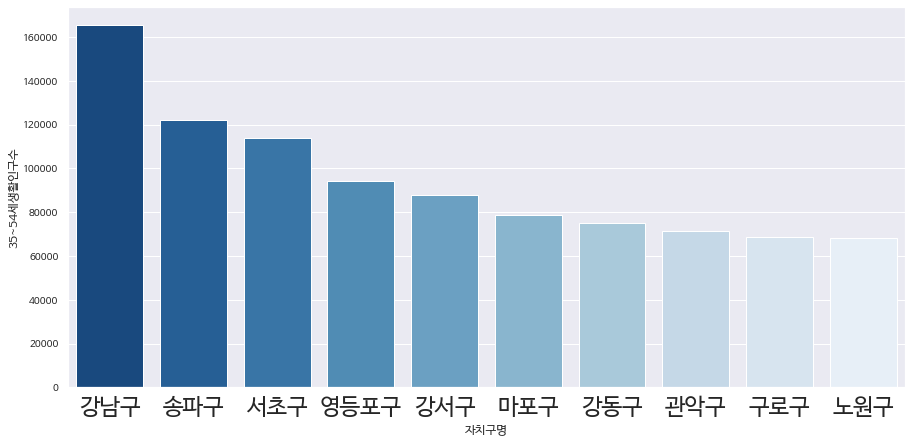

In [ ]:
#구별로 주중 생활인구수의 평균 시각화
plt.figure(figsize = (15,7))
plt.rc('xtick', labelsize=23)
sns.barplot(data=p_weekday.head(10), x= "자치구명", y="35~54세생활인구수", palette ="Blues_r")

주요흡연자층은 주로 강남, 송파, 서초, 영등포, 강서구에서 생활하고 있다. 

## 구별 흡연 단속건수와 흡연자 수 사이의 상관관계 분석

In [ ]:
#df6 : 구별 주요흡연자층의 수와 흡연관련 변수
df6 = pd.merge(p_weekday, df5, left_on = "자치구명", right_on = "구" )
df6.drop(columns="구", inplace=True)
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   자치구명         25 non-null     object 
 1   35~54세생활인구수  25 non-null     float64
 2   흡연민원건수       15 non-null     float64
 3   흡연단속건수       25 non-null     int64  
 4   흡연구역수        25 non-null     int64  
 5   금연구역수        25 non-null     int64  
 6   주민등록인구수      25 non-null     int64  
 7   흡연율          25 non-null     float64
 8   추정흡연자수       25 non-null     int64  
 9   흡연자수대비단속건수   25 non-null     float64
dtypes: float64(4), int64(5), object(1)
memory usage: 2.1+ KB


In [ ]:
# col : 관심변수 설정
col = ["35~54세생활인구수", "흡연단속건수"]

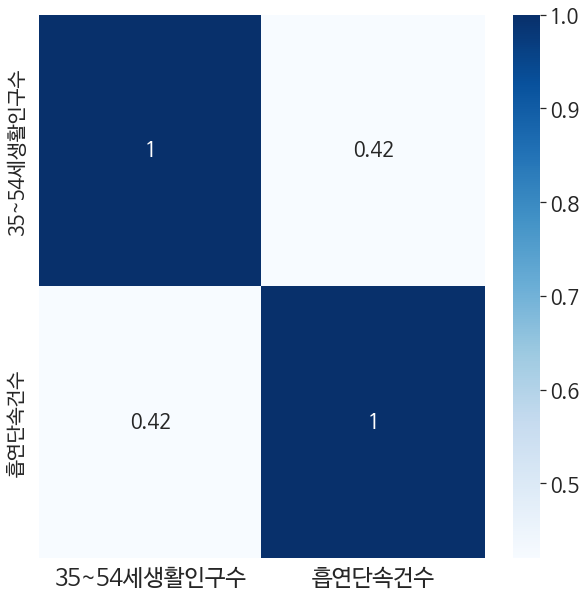

In [ ]:
corr = df6[col].corr()
plt.figure(figsize=(10, 10))
plt.rc('xtick', labelsize=23)
plt.rc('ytick', labelsize=20)
sns.heatmap(corr, cmap="Blues", annot=True, annot_kws={"size": 20})

주요 흡연자 층인 35~54세 생활인구수와 흡연단속건수 사이에 **양의 상관관계가 존재**한다.

즉, 주요 흡연자 층의 수가 많으면 흡연단속건수도 많다

# 3. 문제 집단 정의
국민건강영양통계 이용

출처 : https://knhanes.kdca.go.kr/knhanes/sub03/sub03_02_05.do 


### 35~54세 흡연자 분석 


In [ ]:
# nu : 주요 흡연자 층의 건강관련 데이터
nu = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/남성흡연자_3554.csv", encoding = "cp949")
nu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   job      537 non-null    int64
 1   job_t    537 non-null    int64
 2   job_stt  537 non-null    int64
 3   B_1_5    537 non-null    int64
 4   B_1_2    537 non-null    int64
 5   B_1_3    537 non-null    int64
 6   BS1_2    537 non-null    int64
 7   BS2_3    537 non-null    int64
 8   BS3_2    537 non-null    int64
 9   BS7_22   537 non-null    int64
 10  BR2      537 non-null    int64
 11  BR1_23   537 non-null    int64
 12  BR1_21   537 non-null    int64
 13  BP1      537 non-null    int64
dtypes: int64(14)
memory usage: 58.9 KB


In [ ]:
nu[["job","job_t","job_stt"]] = nu[["job","job_t","job_stt"]].astype("object")

In [ ]:
nu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   job      537 non-null    object
 1   job_t    537 non-null    object
 2   job_stt  537 non-null    object
 3   B_1_5    537 non-null    int64 
 4   B_1_2    537 non-null    int64 
 5   B_1_3    537 non-null    int64 
 6   BS1_2    537 non-null    int64 
 7   BS2_3    537 non-null    int64 
 8   BS3_2    537 non-null    int64 
 9   BS7_22   537 non-null    int64 
 10  BR2      537 non-null    int64 
 11  BR1_23   537 non-null    int64 
 12  BR1_21   537 non-null    int64 
 13  BP1      537 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 58.9+ KB


###  이상치, 결측치 제거


In [ ]:
nu[["BS2_3", "BS3_2"]].describe()

,BS2_3,BS3_2
count,537.000000,537.000000
mean,22.022346,17.597765
std,8.277119,10.176164
min,1.000000,1.000000
25%,18.000000,10.000000
50%,21.000000,20.000000
75%,25.000000,20.000000
max,99.000000,99.000000


In [ ]:
nu = nu[(nu["BS2_3"] != 99) & (nu["BS3_2"] !=99)]
nu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531 entries, 0 to 536
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   job      531 non-null    object
 1   job_t    531 non-null    object
 2   job_stt  531 non-null    object
 3   B_1_5    531 non-null    int64 
 4   B_1_2    531 non-null    int64 
 5   B_1_3    531 non-null    int64 
 6   BS1_2    531 non-null    int64 
 7   BS2_3    531 non-null    int64 
 8   BS3_2    531 non-null    int64 
 9   BS7_22   531 non-null    int64 
 10  BR2      531 non-null    int64 
 11  BR1_23   531 non-null    int64 
 12  BR1_21   531 non-null    int64 
 13  BP1      531 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 62.2+ KB


In [ ]:
nu["B_1_5"].describe()

count    531.000000
mean       2.559322
std        0.889012
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: B_1_5, dtype: float64

In [ ]:
# 주관적 건강 인식 (B_1_5) == 9(모름) 
nu = nu [nu["B_1_5"] != 9]
nu.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530 entries, 0 to 536
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   job      530 non-null    object
 1   job_t    530 non-null    object
 2   job_stt  530 non-null    object
 3   B_1_5    530 non-null    int64 
 4   B_1_2    530 non-null    int64 
 5   B_1_3    530 non-null    int64 
 6   BS1_2    530 non-null    int64 
 7   BS2_3    530 non-null    int64 
 8   BS3_2    530 non-null    int64 
 9   BS7_22   530 non-null    int64 
 10  BR2      530 non-null    int64 
 11  BR1_23   530 non-null    int64 
 12  BR1_21   530 non-null    int64 
 13  BP1      530 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 62.1+ KB


In [ ]:
# 무직 (job == 77)
nu = nu [ nu["job"] != 77]
nu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 0 to 536
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   job      502 non-null    object
 1   job_t    502 non-null    object
 2   job_stt  502 non-null    object
 3   B_1_5    502 non-null    int64 
 4   B_1_2    502 non-null    int64 
 5   B_1_3    502 non-null    int64 
 6   BS1_2    502 non-null    int64 
 7   BS2_3    502 non-null    int64 
 8   BS3_2    502 non-null    int64 
 9   BS7_22   502 non-null    int64 
 10  BR2      502 non-null    int64 
 11  BR1_23   502 non-null    int64 
 12  BR1_21   502 non-null    int64 
 13  BP1      502 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 58.8+ KB


In [ ]:
# 종사상 지위가 없는 사람 (job_stt == 8)
nu = nu [ nu["job_stt"] != 8]
nu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 536
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   job      501 non-null    object
 1   job_t    501 non-null    object
 2   job_stt  501 non-null    object
 3   B_1_5    501 non-null    int64 
 4   B_1_2    501 non-null    int64 
 5   B_1_3    501 non-null    int64 
 6   BS1_2    501 non-null    int64 
 7   BS2_3    501 non-null    int64 
 8   BS3_2    501 non-null    int64 
 9   BS7_22   501 non-null    int64 
 10  BR2      501 non-null    int64 
 11  BR1_23   501 non-null    int64 
 12  BR1_21   501 non-null    int64 
 13  BP1      501 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 58.7+ KB


In [ ]:
# 평균 근무시간 이상치 제거
nu = nu [ (nu["BR1_23"] != 88) & (nu["BR1_23"] != 99) ]
nu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 536
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   job      493 non-null    object
 1   job_t    493 non-null    object
 2   job_stt  493 non-null    object
 3   B_1_5    493 non-null    int64 
 4   B_1_2    493 non-null    int64 
 5   B_1_3    493 non-null    int64 
 6   BS1_2    493 non-null    int64 
 7   BS2_3    493 non-null    int64 
 8   BS3_2    493 non-null    int64 
 9   BS7_22   493 non-null    int64 
 10  BR2      493 non-null    int64 
 11  BR1_23   493 non-null    int64 
 12  BR1_21   493 non-null    int64 
 13  BP1      493 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 57.8+ KB


## 금연구역 내에서 흡연ㅇ 집단과 흡연x 집단 구분
moral 변수를 추가하여 집단을 구분


* ###     moral = 0 : 금연구역 내에서 흡연 o
* ###    moral = 1 : 금연구역 내에서 흡연 x


 


In [ ]:
# moral = 0 : 금연구역 내 흡연o
nu["moral"] = 0
for i in nu.index:
  if nu.loc[i,"BS7_22"] == 3 :
    nu.loc[i,"moral"] = 1


nu["moral"]

0      1
1      1
2      1
3      1
4      0
      ..
532    1
533    1
534    0
535    0
536    1
Name: moral, Length: 493, dtype: int64

In [ ]:
nu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 536
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   job      493 non-null    object
 1   job_t    493 non-null    object
 2   job_stt  493 non-null    object
 3   B_1_5    493 non-null    int64 
 4   B_1_2    493 non-null    int64 
 5   B_1_3    493 non-null    int64 
 6   BS1_2    493 non-null    int64 
 7   BS2_3    493 non-null    int64 
 8   BS3_2    493 non-null    int64 
 9   BS7_22   493 non-null    int64 
 10  BR2      493 non-null    int64 
 11  BR1_23   493 non-null    int64 
 12  BR1_21   493 non-null    int64 
 13  BP1      493 non-null    int64 
 14  moral    493 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 81.6+ KB


In [ ]:
# nu0 : 금연구역 내에서 흡연을 하는 집단
nu0 = nu[nu['moral'] == 0]
print(nu0.shape)
nu0.head()

(135, 15)


,job,job_t,job_stt,B_1_5,B_1_2,B_1_3,BS1_2,BS2_3,BS3_2,BS7_22,BR2,BR1_23,BR1_21,BP1,moral
4,9,5,1,3,2,2,1,24,20,2,2,7,3,3,0
11,5,3,3,3,2,2,0,14,20,2,1,13,4,1,0
19,3,1,3,3,3,3,0,25,15,2,2,8,2,4,0
22,6,3,1,4,1,2,1,21,10,2,2,13,4,3,0
23,4,2,3,3,2,2,1,19,17,2,1,8,3,3,0


In [ ]:
# nu1 : 금연구역 내에서 흡연을 하지 않는 집단
nu1 = nu[nu['moral'] == 1]
print(nu1.shape)
nu1.head()

(358, 15)


,job,job_t,job_stt,B_1_5,B_1_2,B_1_3,BS1_2,BS2_3,BS3_2,BS7_22,BR2,BR1_23,BR1_21,BP1,moral
0,5,3,1,4,2,2,0,20,10,3,1,10,2,2,1
1,5,3,3,2,3,2,1,24,16,3,2,8,3,2,1
2,8,5,3,2,2,3,0,22,20,3,2,13,2,2,1
3,4,2,3,3,3,2,0,21,15,3,2,8,3,3,1
5,9,5,3,2,3,3,1,20,20,3,2,10,2,3,1


### 금연구역 내에서 흡연을 하는 집단의 직업 분석 


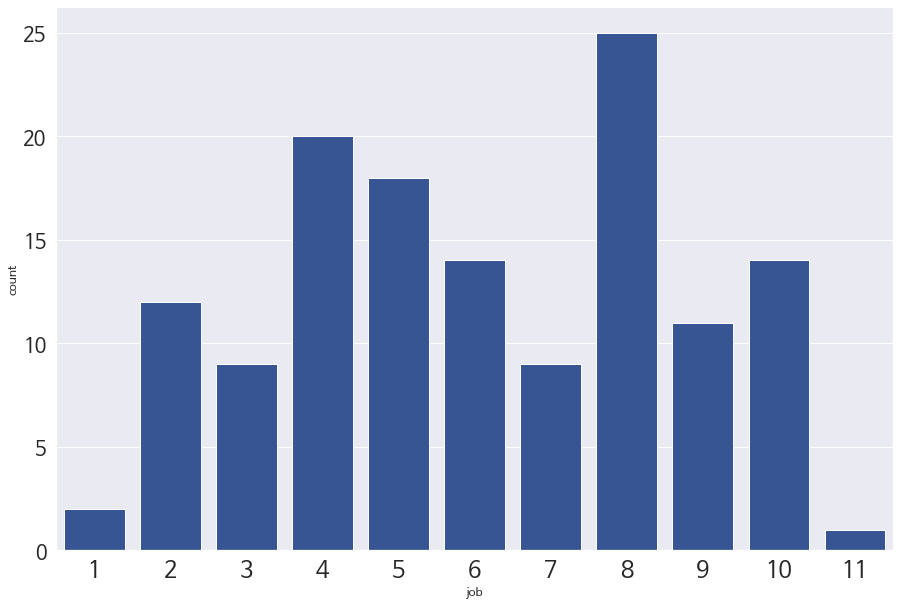

In [ ]:
# 직업 분석
plt.figure(figsize = (15,10))
plt.rc('xtick', labelsize=23)
sns.countplot(data=nu0, x = "job" , color ="#274FA3")

35~54세 흡연자 중에서 금연구역 내 흡연을 하는 집단은 주로 사무종사자 (4), 서비스 종사자(5), 기능원 및 관련 기능종사자(8) 이다. 

이들은 주로 **유동인구가 많거나 오피스상권인 곳**에서 생활하는 사람들이다.

### 문제 집단의 특성 분석을 위해 t-test를 진행

In [ ]:
nu.groupby('moral')[["BS2_3", "BS3_2", "BP1"]].mean()

,BS2_3,BS3_2,BP1
moral,,,
0,22.474074,18.348148,2.533333
1,21.136872,16.452514,2.734637


총 흡연기간 (BS2_3), 1일 평균흡연량 (BS3_2), 스트레스 정도 (BP1) 를 
집단 별로 비교 했을 때,

금연 구역에서 흡연을 하는 집단 (moral = 0) 이 **총 흡연기간, 1일 평균흡연량, 스트레스 정도**가 높다.

In [ ]:
# BS2_3 : 총 흡연기간
from scipy import stats

T_test = stats.ttest_ind(nu0['BS2_3'], nu1['BS2_3'])
T_test

Ttest_indResult(statistic=2.234239174519243, pvalue=0.025916674552233374)

In [ ]:
# BS3_2 : 1일 평균 흡연량
T_test = stats.ttest_ind(nu0['BS3_2'], nu1['BS3_2'])
T_test

Ttest_indResult(statistic=2.3525884706153444, pvalue=0.019036990826454357)

In [ ]:
# BP1 : 스트레스 정도
T_test = stats.ttest_ind(nu0['BP1'], nu1['BP1'])
T_test

Ttest_indResult(statistic=-2.6235204050684184, pvalue=0.008973393589047848)

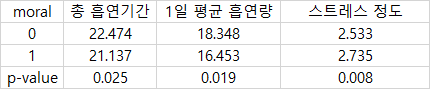

금연 구역내 흡연 하는 집단(moral =0) 과 금연구역 내 흡연하지 않는 집단(moral =0)은 

현 흡연자의 총 흡연기간(BS2_3), 1일 평균 흡연량 (BS3_2), 스트레스 정도(BP1) 에서 **유의미한 차이**가 있다. 



결론적으로, 금연 구역 내에서 흡연을 하는 집단은 총 흡연기간, 1일 평균 흡연량,  스트레스 정도가 높다.



금연 구역 내에서 흡연을 하는 집단은 1일 평균 흡연량이 높아 간접흡연에 미치는 영향 또한 높다.
따라서 이들은 상대적으로 다양한 장소에서 간접흡연 피해 유발할 가능성이 높을 것이다.

## 금연 구역 내에서 흡연을 하는 집단 군집화

금연 구역 내에서 흡연을 하는 집단은 왜 스트레스 정도가 높을까?

주요 변수


*   BR1_21 : 휴식시간 충분도
*   BR2 : 피로 인식도
* BP1 : 스트레스 정도

In [ ]:
# var에 분석에 사용할 변수의 값을 넣기
# BR1_21 (휴식시간 충분도), BR2(피로 인식도), BP1(평소 스트레스 정도)
var = nu0[["BR1_21","BR2", "BP1"]].values

In [ ]:
# inertia : 빈 리스트를 만들기
inertia = []

In [ ]:
# 군집수 n을 1에서 11까지 돌아가며 var에 대해 k-means 알고리즘을 적용하여 inertia 값을 리스트에 저장
from sklearn.cluster import KMeans
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n) )
    algorithm.fit(var)
    inertia.append(algorithm.inertia_)

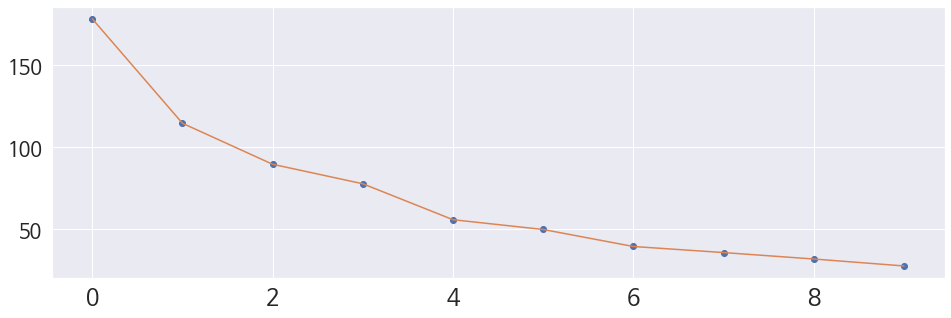

In [ ]:
# inertia값 시각화 
plt.figure(1 , figsize = (16 ,5))
plt.plot(inertia,'o')
plt.plot(inertia, '-')

군집수를 5로 지정

In [ ]:
# 군집수를 5로 지정하고. 기존 데이터셋에 주요 흡연자층이 속한 클러스터 값을 넣기.
algorithm = (KMeans(n_clusters = 5 ,random_state= 111) )
algorithm.fit(var)
labels = algorithm.labels_

In [ ]:
nu0['cluster'] = labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


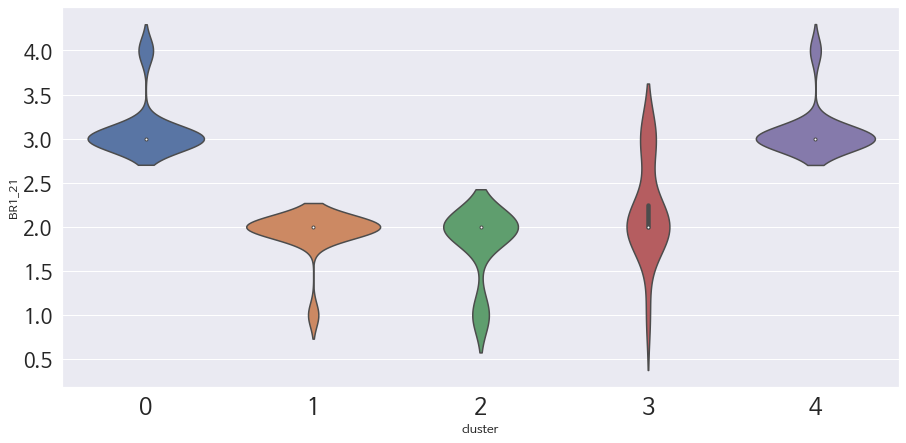

In [ ]:
# BR1_21 : 휴식시간 충분도
plt.figure(1 , figsize = (15 ,7))
sns.violinplot(x='cluster', y="BR1_21", data=nu0)

cluster 1,2,3은 휴식시간이 충분한 편이다. 
반면 cluster 0, 4는 휴식시간이 충분하지 않다.

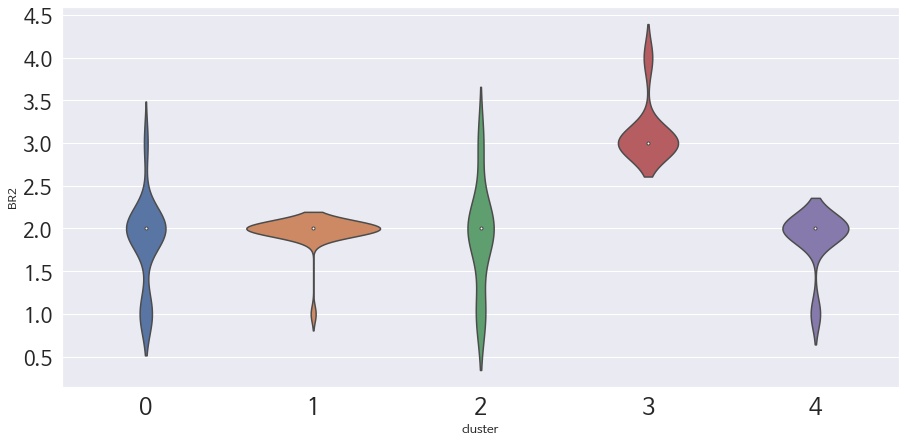

In [ ]:
# BR2 : 피로인식도
plt.figure(1 , figsize = (15 ,7))
sns.violinplot(x='cluster', y="BR2", data=nu0)

cluster 3을 제외한 나머지 cluster 0, 1, 2, 4는 가끔 피로를 느낀다.

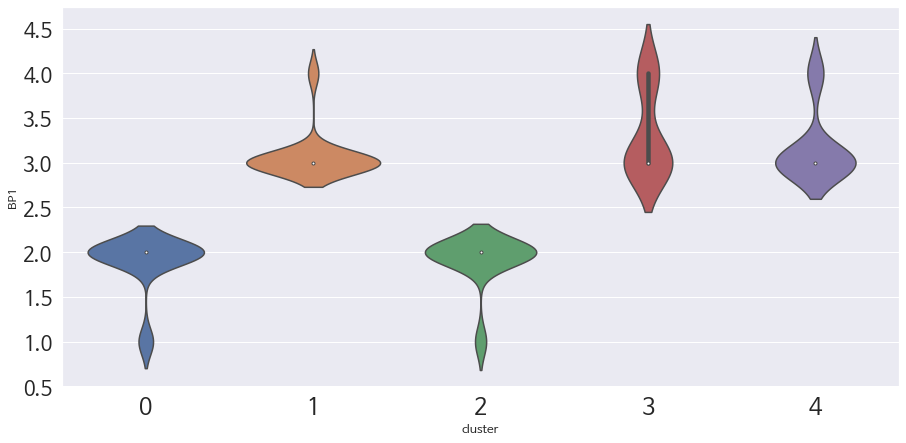

In [ ]:
# BP1 : 스트레스 정도
plt.figure(1 , figsize = (15 ,7))
sns.violinplot(x='cluster', y="BP1", data=nu0)

cluster 1,3,4는 스트레스 정도가 적다. 반면 cluster 0, 2는 스트레스 정도가 많다.

In [ ]:
nu0.groupby('cluster')[[ "BR1_21", "BR2", "BP1"]].mean()

,BR1_21,BR2,BP1
cluster,,,
0,3.111111,1.844444,1.888889
1,1.928571,1.964286,3.071429
2,1.818182,1.909091,1.909091
3,2.187500,3.125000,3.312500
4,3.083333,1.875000,3.166667


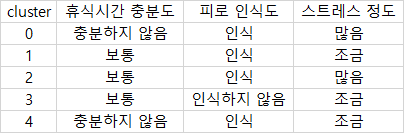

흡연시설 탐색을 게을리 할 가능성이 높은 cluster 0 을 VIP로 설정한다.
휴신시간이 충분하지 않고 피로를 인식하고 있어 흡연 시설 탐색을 게을리 할 가능성이 높기 때문이다.


# 4. 흡연 시설 입지 선정

### 스타벅스 입점 위치 선정 고려사항
* 7 ~19 시 유동인구 수
* 도심 오피스 상권 여부

이는 흡연시설 입지 선정 기준 데이터로 적합하다.


##  구별 스타벅스 점포 수 파악

공공데이터 포털에서 제공하는 "소상공인시장진흥공단_상가(상권)정보" 데이터 이용

출처 : https://www.data.go.kr/tcs/dss/selectFileDataDetailView.do?publicDataPk=15083033


### 스타벅스 데이터만 가져오기

In [ ]:
# 공공데이터 포털에서 소상공인시장진흥공단_상가(상권)정보 데이터 이용
df2 = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/소상공인시장진흥공단_상가(상권)정보_서울_202109.csv")
df2.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,22767534,BYC상신점,상신점,D,소매,D05,의복의류,D05A07,셔츠/내의/속옷,NaN,NaN,11,서울특별시,11710,송파구,1171053200,거여2동,1171011300,거여동,1171011300100360000,1,대지,36,NaN,서울특별시 송파구 거여동 36,117103123014,서울특별시 송파구 오금로,527,NaN,1171011300100360000022458,성암빌딩,서울특별시 송파구 오금로 527,138110,5768.0,NaN,1,NaN,127.147321,37.493054
1,23324279,제중건강원,NaN,D,소매,D10,건강/미용식품,D10A07,건강원,G47216,건강보조식품 소매업,11,서울특별시,11560,영등포구,1156053500,영등포동,1156010600,영등포동5가,1156010600100410001,1,대지,41,1.0,서울특별시 영등포구 영등포동5가 41-1,115604154799,서울특별시 영등포구 영중로14길,11,17.0,1156010600100410002034626,NaN,서울특별시 영등포구 영중로14길 11-17,150035,7250.0,NaN,1,NaN,126.907168,37.520613
2,24525909,민속악기사,NaN,D,소매,D04,취미/오락관련소매,D04A09,악기판매,G47593,악기 소매업,11,서울특별시,11200,성동구,1120079000,용답동,1120012200,용답동,1120012200101420011,1,대지,142,11.0,서울특별시 성동구 용답동 142-11,112004109480,서울특별시 성동구 용답5길,2,NaN,1120012200101420011000227,NaN,서울특별시 성동구 용답5길 2,133849,4803.0,NaN,NaN,NaN,127.049018,37.566857
3,17174119,쓰리에프,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11590,동작구,1159063000,사당2동,1159010700,사당동,1159010700101390072,1,대지,139,72.0,서울특별시 동작구 사당동 139-72,115904157119,서울특별시 동작구 동작대로27가길,12,NaN,1159010700101390073009536,NaN,서울특별시 동작구 동작대로27가길 12,156816,7008.0,NaN,NaN,NaN,126.980952,37.487105
4,17174096,채움,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11110,종로구,1111061500,종로1.2.3.4가동,1111012400,수송동,1111012400100580000,1,대지,58,NaN,서울특별시 종로구 수송동 58,111103100006,서울특별시 종로구 삼봉로,81,NaN,1111012400100580000017956,두산위브파빌리온,서울특별시 종로구 삼봉로 81,110858,3150.0,NaN,NaN,NaN,126.981794,37.572387


In [ ]:
# 결측치 보기
df2.isnull().sum()

상가업소번호            0
상호명               1
지점명          266267
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      19473
표준산업분류명       19473
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명            645
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         65471
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        284885
건물관리번호            0
건물명          167594
도로명주소             0
구우편번호             0
신우편번호             5
동정보          296772
층정보          121746
호정보          325880
경도                0
위도                0
dtype: int64

In [ ]:
# 사용할 컬럼만 따로 colums에 모으기
columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', 
           '경도', '위도']
df2 = df2[columns].copy()
df2.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,BYC상신점,소매,의복의류,셔츠/내의/속옷,서울특별시,송파구,거여2동,거여동,서울특별시 송파구 오금로 527,127.147321,37.493054
1,제중건강원,소매,건강/미용식품,건강원,서울특별시,영등포구,영등포동,영등포동5가,서울특별시 영등포구 영중로14길 11-17,126.907168,37.520613
2,민속악기사,소매,취미/오락관련소매,악기판매,서울특별시,성동구,용답동,용답동,서울특별시 성동구 용답5길 2,127.049018,37.566857
3,쓰리에프,음식,한식,한식/백반/한정식,서울특별시,동작구,사당2동,사당동,서울특별시 동작구 동작대로27가길 12,126.980952,37.487105
4,채움,음식,한식,한식/백반/한정식,서울특별시,종로구,종로1.2.3.4가동,수송동,서울특별시 종로구 삼봉로 81,126.981794,37.572387


In [ ]:
df2["상권업종중분류명"].unique()

array(['의복의류', '건강/미용식품', '취미/오락관련소매', '한식', '유흥주점', '학원-창업취업취미',
       '학원-보습교습입시', '도서관/독서실', '자동차/자동차용품', '부동산중개', '사진/광학/정밀기기소매',
       '닭/오리요리', '선물/팬시/기념품', '이/미용/건강', '커피점/카페', '무도/유흥/가무', '대중목욕탕/휴게',
       '주유소/충전소', '패스트푸드', '가정/주방/인테리어', '세탁/가사서비스', '기타서비스업', '자동차/이륜차',
       '사무/문구/컴퓨터', '중식', 'PC/오락/당구/볼링등', '음/식료품소매', '종합소매점', '화장품소매',
       '가방/신발/액세서리', '시계/귀금속소매', '운동/경기용품소매', '양식', '제과제빵떡케익', '학원기타',
       '가전제품소매', '학원-예능취미체육', '유아교육', '물품기기대여', '사진', '학문교육기타',
       '애견/애완/동물', '분식', '철물/난방/건설자재소매', '학원-음악미술무용', '별식/퓨전요리', '대행업',
       '연극/영화/극장', '모텔/여관/여인숙', '주택수리', '호텔/콘도', '의약/의료품소매', '실외운동시설',
       '학원-어학', '기타판매업', '유아용품', '가구소매', '개인/가정용품수리', '일식/수산물',
       '인력/고용/용역알선', '책/서적/도서', '기타음식업', '광고/인쇄', '실내운동시설', '운송/배달/택배',
       '예식/의례/관혼상제', '요가/단전/마사지', '운영관리시설', '부페', '법무세무회계', '개인서비스',
       '평가/개발/관리', '중고품소매/교환', '분양', '예술품/골동품/수석/분재', '페인트/유리제품소매',
       '음식배달서비스', '스포츠/운동', '학원-자격/국가고시', '종교용품판매', '경마/경륜/성인오락', '민박/하숙',
       '행사/이벤트', '학

In [ ]:
# 상호명 결측 확인
df2[df2["상호명"].isnull()]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
84370,NaN,음식,한식,한식/백반/한정식,서울특별시,중구,을지로동,을지로4가,서울특별시 중구 창경궁로5길 27,126.996415,37.566908


In [ ]:
df2.shape

(325880, 11)

In [ ]:
# 상호명 null인 데이터 제거
df2.drop(index=84370, inplace=True)
df2.shape

(325879, 11)

In [ ]:
# 문자열을 소문자로 변경
df2["상호명_소문자"] = df2["상호명"].str.lower()

In [ ]:
# star : 상호명에서 스타벅스만 가져오기
star = df2.loc[df2["상호명_소문자"].str.contains("스타벅스|starbucks")]

In [ ]:
# "상권업중분류명"을 통해 분류 혹은 데이터가 잘못 색인된 데이터가 있는지 확인
star["상권업종중분류명"].value_counts()

커피점/카페    489
일식/수산물      1
패스트푸드       1
한식          1
Name: 상권업종중분류명, dtype: int64

In [ ]:
# star : 스타벅스 데이터만
star = star[star["상권업종중분류명"] == "커피점/카페"].copy()
star.shape

(489, 12)

## 구별 스타벅스 분포 시각화

In [ ]:
# g_star : 스타벅스 데이터 시군구명으로 그룹화하기
g_star = star.groupby("시군구명")["상호명"].count()
g_star.head()

시군구명
강남구    79
강동구    13
강북구     5
강서구    17
관악구    11
Name: 상호명, dtype: int64

In [ ]:
# 데이터 프레임으로 만들기
g_star = g_star.reset_index()
g_star.head()

,시군구명,상호명
0,강남구,79
1,강동구,13
2,강북구,5
3,강서구,17
4,관악구,11


In [ ]:
# 상호명을 매장수로 변경하기
g_star.columns=["시군구명", "매장수"]
g_star.head()

,시군구명,매장수
0,강남구,79
1,강동구,13
2,강북구,5
3,강서구,17
4,관악구,11


In [ ]:
# 매장수를 기준으로 정렬하기
g_star.sort_values("매장수",ascending= False, inplace=True)

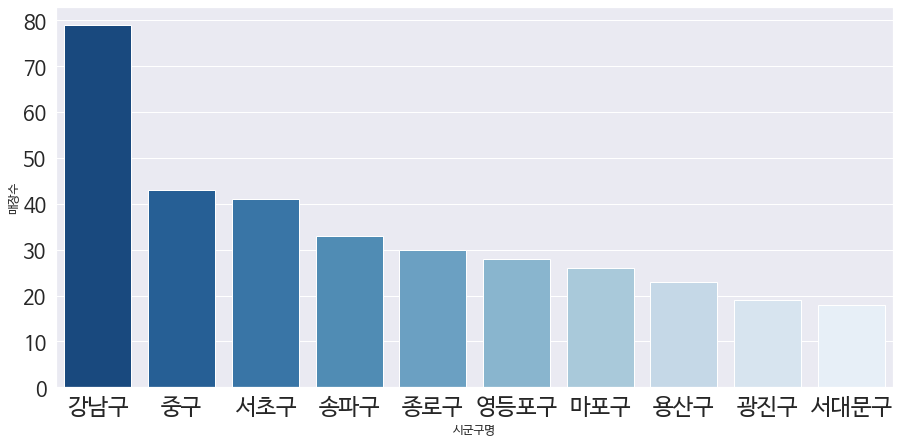

In [ ]:
#시군구별로 스타벅스 갯수 막대그래프로 보기
plt.figure(figsize=(15, 7))
plt.rc('xtick', labelsize=23)
plt.rc('ytick', labelsize=20)
sns.barplot(data = g_star.head(10), x="시군구명", y="매장수", palette = "Blues_r")

스타벅스 매장 수가 많은 상위 5개의 지역구는 강남구, 중구, 서초구, 종로구, 영등포구 이다.

In [ ]:
import folium
lat = 37.5642135
long = 127.0016985

In [ ]:
# 서울의 행정구역 경계를 GeoJSON으로 표현한 파일 
geo_path = '/content/drive/MyDrive/Colab Notebooks/seoul_municipalities_geo_simple.json'

import json
geo_json = json.load(open(geo_path, encoding="utf-8"))
geo_json

{'features': [{'geometry': {'coordinates': [[[127.11519584981606,
       37.557533180704915],
      [127.11879551821994, 37.557222485451305],
      [127.12146867175024, 37.55986003393365],
      [127.12435254630417, 37.56144246249796],
      [127.13593925898998, 37.56564793048277],
      [127.14930548011061, 37.56892250303897],
      [127.15511020940411, 37.57093642128295],
      [127.16683184366129, 37.57672487388627],
      [127.17038810813094, 37.576465605301046],
      [127.17607118428914, 37.57678573961056],
      [127.17905504160184, 37.57791388161732],
      [127.17747787800164, 37.57448983055031],
      [127.1781775408844, 37.571481967974336],
      [127.17995281860672, 37.569309661290504],
      [127.18122821955262, 37.56636089217979],
      [127.18169407550688, 37.56286338914073],
      [127.18408792330152, 37.55814280369575],
      [127.18350810324185, 37.550053002101485],
      [127.1852644795464, 37.54888592026534],
      [127.18480906237207, 37.545296888806796],
      [12

In [ ]:
# 구별로 스타벅스 갯수 지도에 표시
m = folium.Map([lat, long], tiles='stamen toner') #서울을 중심값으로 지정

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=g_star,
    columns=['시군구명', '매장수'], 
    key_on='feature.properties.name', #구와 같은 데이터를 name에서 찾아서 해당 지역을 색칠
    fill_color='YlGn', #yellow and green
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='스타벅스 매장수' #범례제목
).add_to(m)

m
#행정구역에 따라 스타벅스 매장이 많은 곳은 진하게 표시

In [ ]:
# 구별 주요흡연자 수
m = folium.Map([lat, long], tiles='stamen toner') #서울을 중심값으로 지정

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df6,
    columns=['자치구명', '35~54세생활인구수'], 
    key_on='feature.properties.name', #구와 같은 데이터를 name에서 찾아서 해당 지역을 색칠
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name= '35~54세생활인구수' #범례제목
).add_to(m)

m

In [ ]:
# 구별 생활인구수 지도 위에 스타벅스 위치 표시
for i in star.index:
    sub_lat = star.loc[i, "위도"]
    sub_long = star.loc[i, "경도"]
    
    title = f"{star.loc[i, '상호명']} - {star.loc[i, '도로명주소']}" #문자열을 더할 때) formating방법
    #동일 title = df_cafe.loc[i, '상호명']+ " - " + df_cafe.loc[i, '도로명주소']
    color = "green"
    
    folium.CircleMarker([sub_lat, sub_long],
                        radius=0.001,
                        color=color,
                          tooltip=title).add_to(m)

m

## 구별 스타벅스 수와 주요 흡연자수 상관관계 분석

In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   자치구명         25 non-null     object 
 1   35~54세생활인구수  25 non-null     float64
 2   흡연민원건수       15 non-null     float64
 3   흡연단속건수       25 non-null     int64  
 4   흡연구역수        25 non-null     int64  
 5   금연구역수        25 non-null     int64  
 6   주민등록인구수      25 non-null     int64  
 7   흡연율          25 non-null     float64
 8   추정흡연자수       25 non-null     int64  
 9   흡연자수대비단속건수   25 non-null     float64
dtypes: float64(4), int64(5), object(1)
memory usage: 2.1+ KB


In [ ]:
#df7 : 담배와 전자담배를 합한 전체 흡연자 수 

df7 = pd.merge(df6, g_star, left_on = "자치구명", right_on = "시군구명" )
df7.drop(columns="시군구명", inplace=True)
df7.head()

,자치구명,35~54세생활인구수,흡연민원건수,흡연단속건수,흡연구역수,금연구역수,주민등록인구수,흡연율,추정흡연자수,흡연자수대비단속건수,매장수
0,강남구,165487.809160,2220.0,1224,205,29565,547453,0.18,98542,0.012,79
1,송파구,122104.721533,1852.0,2332,145,16997,673507,0.15,100353,0.023,33
2,서초구,113862.526718,955.0,18728,244,16289,438163,0.15,65724,0.015,41
3,영등포구,94281.735528,NaN,6278,491,13881,403600,0.16,63365,0.099,28
4,강서구,87741.319816,526.0,1294,453,13883,603611,0.19,114082,0.011,17


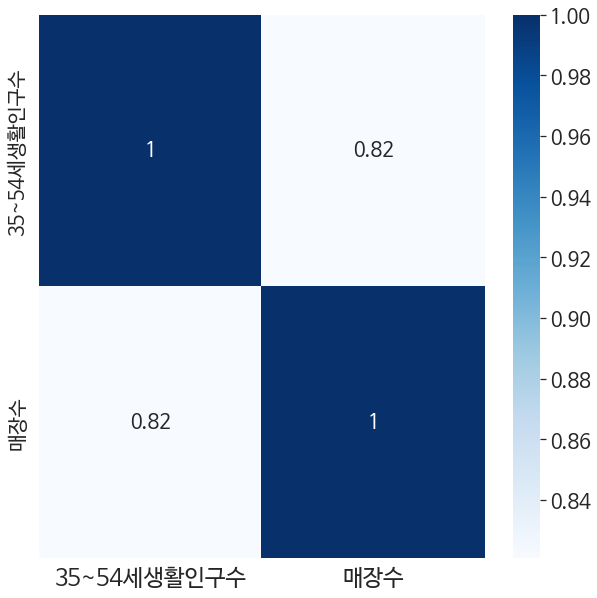

In [ ]:
corr = df7[["35~54세생활인구수","매장수"]].corr()
plt.figure(figsize=(10, 10))
plt.rc('xtick', labelsize=23)
plt.rc('ytick', labelsize=20)
sns.heatmap(corr, cmap="Blues", annot=True, annot_kws={"size": 20})

스타벅스 매장 수와 주요 흡연자 수 사이에 **강한 양의 상관관계**가 존재한다. 



따라서 

1.스타벅스 매장 수, 흡연 단속 건수 TOP 5에 중복해서 포함되는 지역구를 우선 확충 지역으로 설정한다. 

2.스타벅스의 입지, 점포 간 간격을 고려한 흡연 시설 확충 계획 수립이 요구된다.